# The Story of Film



<img src="../reports/figures/giphy.gif" alt="text"/>







The birth of the Motion Picture Camera in the late 18th century gave birth to possibly the most potent form of entertainment in existence: Cinema. Movies have managed to enthrall audiences ever since one second clips of racing horses emerged in the 1890s to the introduction of sound in the 1920s to the birth of color in the 1930s to mainstream 3D Movies in the early 2010s.

Cinema had humble origins in terms of plot, direction and acting (mainly due to its extremely short duration in its early days) but since then, movie industries around the world have been blessed with creative geniuses in the form of directors, screenwriters, actors, sound designers and cinematographers. It has also spread itself into a plethora of genres ranging from romance to comedy to science fiction to horror.

As with almost every kid born in the last century, I was amazed by movies. I was addicted to it. And I've always wanted to know more about the enigmatic world of cinema. In this notebook, I will try and gain some insights using data. With us, we have a dataset of about 45000 movies with metadata collected from TMDB. Using this data, we will try and answer various questions that I've always had about movies.

In this notebook, I will also try and build the following:

- A **Regressor** that can, to a certain degree, predict the revenue of a particular movie.
- A **Classifier** that identifies if a movie will be a hit or will make the producers lose money.

## Importing Libraries and Loading Our Data

In [1]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
plotly.tools.set_credentials_file(username='rounakbanik', api_key='xTLaHBy9MVv5szF4Pwan')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [2]:
df = pd.read_csv('../data/raw/movies_metadata.csv')
df.head().transpose()

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


### Understanding the Dataset
The dataset above was obtained through the TMDB API. The movies available in this dataset are in correspondence with the movies that are listed in the **MovieLens Latest Full Dataset** comprising of 26 million ratings on 45,000 movies from 27,000 users. Let us have a look at the features that are available to us.

In [3]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

### Features
- **adult:** Indicates if the movie is X-Rated or Adult.
- **belongs_to_collection:** A stringified dictionary that gives information on the movie series the particular film belongs to.
- **budget:** The budget of the movie in dollars.
- **genres:** A stringified list of dictionaries that list out all the genres associated with the movie.
- **homepage:** The Official Homepage of the move.
- **id:** The ID of the move.
- **imdb_id:** The IMDB ID of the movie.
- **original_language:** The language in which the movie was originally shot in.
- **original_title:** The original title of the movie.
- **overview:** A brief blurb of the movie.
- **popularity:** The Popularity Score assigned by TMDB.
- **poster_path:** The URL of the poster image.
- **production_companies:** A stringified list of production companies involved with the making of the movie.
- **production_countries:** A stringified list of countries where the movie was shot/produced in.
- **release_date:** Theatrical Release Date of the movie.
- **revenue:** The total revenue of the movie in dollars.
- **runtime:** The runtime of the movie in minutes.
- **spoken_languages:** A stringified list of spoken languages in the film.
- **status:** The status of the movie (Released, To Be Released, Announced, etc.)
- **tagline:** The tagline of the movie.
- **title:** The Official Title of the movie.
- **video:** Indicates if there is a video present of the movie with TMDB.
- **vote_average:** The average rating of the movie.
- **vote_count:** The number of votes by users, as counted by TMDB.

In [4]:
df.shape

(45466, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

There are a total of **45,466** movies with **24 features** . Most of the features have very few NaN values (apart from **homepage** and **tagline** ). We will attempt at cleaning this dataset to a form suitable for analysis in the next section.


### Data Wrangling





The data that was originally obtained was in the form of a JSON File. This was converted manually into a CSV file to arrive at an input that could be loaded into a Pandas DataFrame effortlessly. In other words, the dataset we have in our hands is already relatively clean. We will however attempt at learning more about our features and performing appropriate wrangling steps to arrive at a form that is more suitable for analysis.

Let us start by removing the features that are not useful to us.

In [6]:
df = df.drop(['imdb_id'], axis=1)

In [7]:
df[df['original_title'] != df['title']][['title', 'original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


The original title refers to the title of the movie in the native language in which the movie was shot. As such, I will prefer using the translated, Anglicized name in this analysis and hence, will drop the original titles altogether. We will be able to deduce if the movie is a foreign language film by looking at the **original_language** feature so no tangible information is lost in doing so.

In [8]:
df = df.drop(['original_title'], axis=1)

In [9]:
df[df['revenue'] == 0].shape

(38052, 22)

We see that the majority of the movies have a recorded revenue of **0**. This indicates that we do not have information about the total revenue for these movies. Although this forms the majority of the movies available to us, we will still use revenue as an extremely important feature going forward from the remaining 7000 moves.

In [10]:
df['revenue'] = df['revenue'].replace(0, np.nan)

The **budget** feature has some unclean values that makes Pandas assign it as a generic object. We proceed to convert this into a numeric variable and replace all the non-numeric values with NaN. Finally, as with budget, we will convert all the values of 0 with NaN to indicate the absence of information regarding budget.

In [12]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 22)

As we move forward trying to answer certain questions, we will have to construct several features suitable for that particular query. For now, we will construct two very important features:

- **year:** The year in which the movie was released.
- **return:** The ratio of revenue to budget.
The return feature is extremely insightful as it will give us a more accurate picture of the financial success of a movie. Presently, our data will not be able to judge if a $200 million budget movie that earned $100 million did better than a $50,000 budget movie taking in $200,000. This feature will be able to capture that information.

A return value > 1 would indicate profit whereas a return value < 1 would indicate a loss.

In [14]:
df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape

(40085, 23)

We have close to **5000 movies** for which we have data on revenue and budget ratio. This is close to **10% of the entire dataset** . Although this may seem small, this is enough to perform very useful analysis and discover interesting insights about the world of movies.

In [15]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [23]:
df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

There are close to **0 adult movies** in this dataset. The **adult** feature therefore is not of much use to us and can be safely dropped.

In [25]:
df = df.drop('adult', axis=1)

In [26]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style='height:100px;'>"

### Exploratory Data Analysis
#### Title and Overview Wordclouds
Are there certain words that figure more often in Movie Titles and Movie Blurbs? I suspect there are some words which are considered more potent and considered more worthy of a title. Let us find out!

In [27]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [28]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

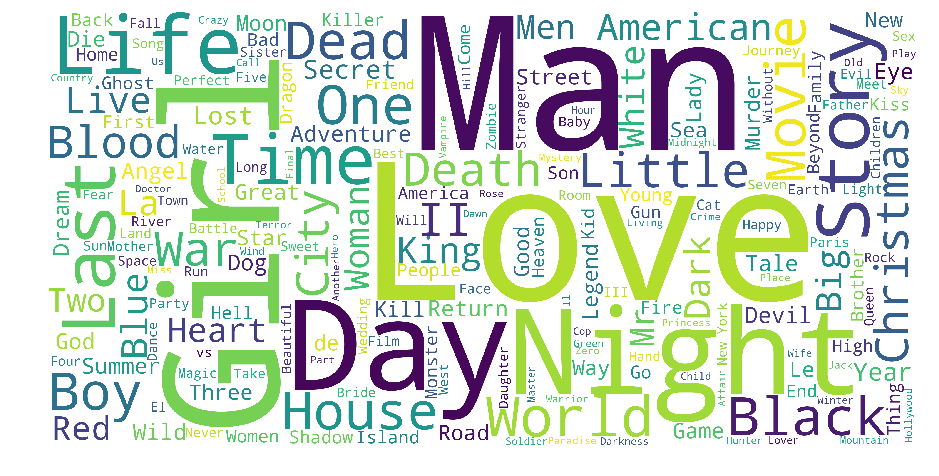

In [29]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16, 8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

The word **Love** is the most commonly used word in movie titles. **Girl**, **Day** and **Man** are also among the most commonly occuring words. I think this encapsulates the idea of the ubiquitious presence of romance in movies pretty well.

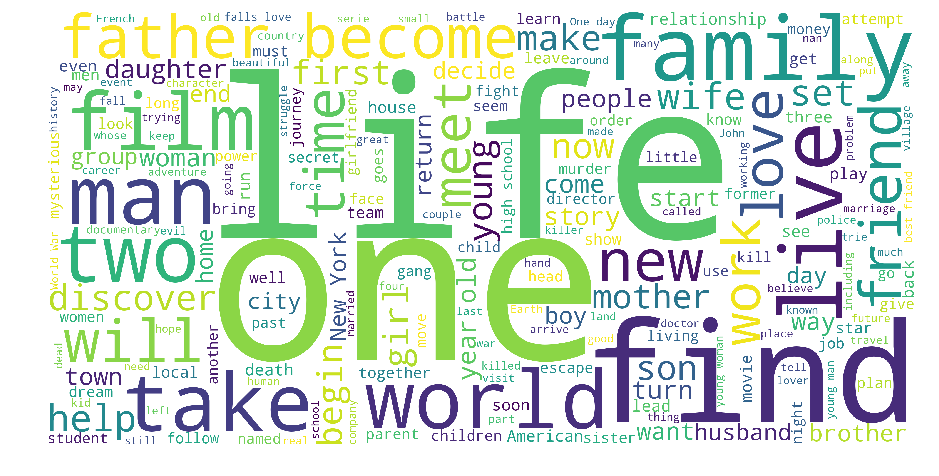

In [33]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

**Life** is the most commonly used word in Movie titles. **One** and **Find** are also popular in Movie Blurbs. Together with **Love**, **Man** and **Girl**, these wordclouds give us a pretty good idea of the most popular themes present in movies.

#### Production Countries
The Full MovieLens Dataset consists of movies that are overwhelmingly in the English language (more than 31000). However, these movies may have shot in various locations around the world. It would be interesting to see which countries serve as the most popular destinations for shooting movies by filmmakers, especially those in the United States of America and the United Kingdom.

In [32]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

0                               Toy Story
1                                 Jumanji
2                        Grumpier Old Men
3                       Waiting to Exhale
4             Father of the Bride Part II
5                                    Heat
6                                 Sabrina
7                            Tom and Huck
8                            Sudden Death
9                               GoldenEye
10                 The American President
11            Dracula: Dead and Loving It
12                                  Balto
13                                  Nixon
14                       Cutthroat Island
15                                 Casino
16                  Sense and Sensibility
17                             Four Rooms
18         Ace Ventura: When Nature Calls
19                            Money Train
20                             Get Shorty
21                                Copycat
22                              Assassins
23                                

In [36]:
s = df.apply(lambda x: pd.Series(x['production_countries']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [40]:
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

,num_movies,country
0,17851,"[{'iso_3166_1': 'US', 'name': 'United States o..."
1,6282,[]
2,2238,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]"
3,1654,"[{'iso_3166_1': 'FR', 'name': 'France'}]"
4,1356,"[{'iso_3166_1': 'JP', 'name': 'Japan'}]"
5,1030,"[{'iso_3166_1': 'IT', 'name': 'Italy'}]"
6,840,"[{'iso_3166_1': 'CA', 'name': 'Canada'}]"
7,749,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]"
8,735,"[{'iso_3166_1': 'IN', 'name': 'India'}]"
9,735,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]"


In [41]:
con_df = con_df[con_df['country'] != 'United States of America']

In [45]:
data = [ dict(
        type = 'choropleth',
        )]

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
2363    True
2364    True
2365    True
2366    True
2367    True
2368    True
2369    True
2370    True
2371    True
2372    True
2373    True
2374    True
2375    True
2376    True
2377    True
2378    True
2379    True
2380    True
2381    True
2382    True
2383    True
2384    True
2385    True
2386    True
2387    True
2388    True
2389    True
2390    True
2391    True
2392    True
Name: country, Length: 2393, dtype: bool